In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import gudhi as gd
from typing import List

## We are going to use persistence homology (specifically H0) to test our sparsity hypothesis.

#### First, we select the top 15 teams and the bottom 15 teams of our dataset.

In [10]:
data = pd.read_csv("Final.csv")
data = data[data['Min'] > 800]

teams = ['Barcelona', 'Real Madrid', 'Atlético Madrid', 'Manchester City',
        'Arsenal', 'Manchester Utd', 'Napoli', 'Lazio', 'Inter', 'Bayern Munich',
        'Dortmund', 'RB Leipzig', 'Paris S-G', 'Lens', 'Marseille', 'Elche',
        'Espanyol', 'Valladolid', 'Southampton', 'Leeds United', 'Everton',
        'Sampdoria', 'Cremonese', 'Spezia', 'Hertha BSC', 'Schalke 04',
        'Stuttgart', 'Angers', 'Troyes', 'Ajaccio']

teams_data = {}

# Select the 11 players that played the most minutes
for team in teams:
    team_data = data[data['Squad'] == team].sort_values(by='Min', ascending=False)

    team_data = team_data.head(11)

    teams_data[team] = team_data

In [11]:
def prepare_data(players_df: pd.DataFrame) -> List:
    players = players_df.values.tolist()
    
    for i in range(len(players)):
        del players[i][:9]

    return players


#### We define a function that will help us compare the sum of the H0 death times.

In [12]:
def sum_of_longest_distances(players_data: List) -> int:
    rc = gd.RipsComplex(points=players_data, max_edge_length=100)
    st = rc.create_simplex_tree(max_dimension=2)
    diag = st.persistence()
    
    h0 = [p for p in diag if p[0] == 0 and p[1][1] != float('inf')]
    
    sum_longest_distances = sum(p[1][1] for p in h0)
    
    return sum_longest_distances


#### We now compare the sum of the H0 death times of each team to check if there is any visible insight.

In [13]:
team_distances = {}

for team_name, team_data in teams_data.items():

    prepared_data = prepare_data(team_data)

    distance = sum_of_longest_distances(prepared_data)
    
    team_distances[team_name] = distance

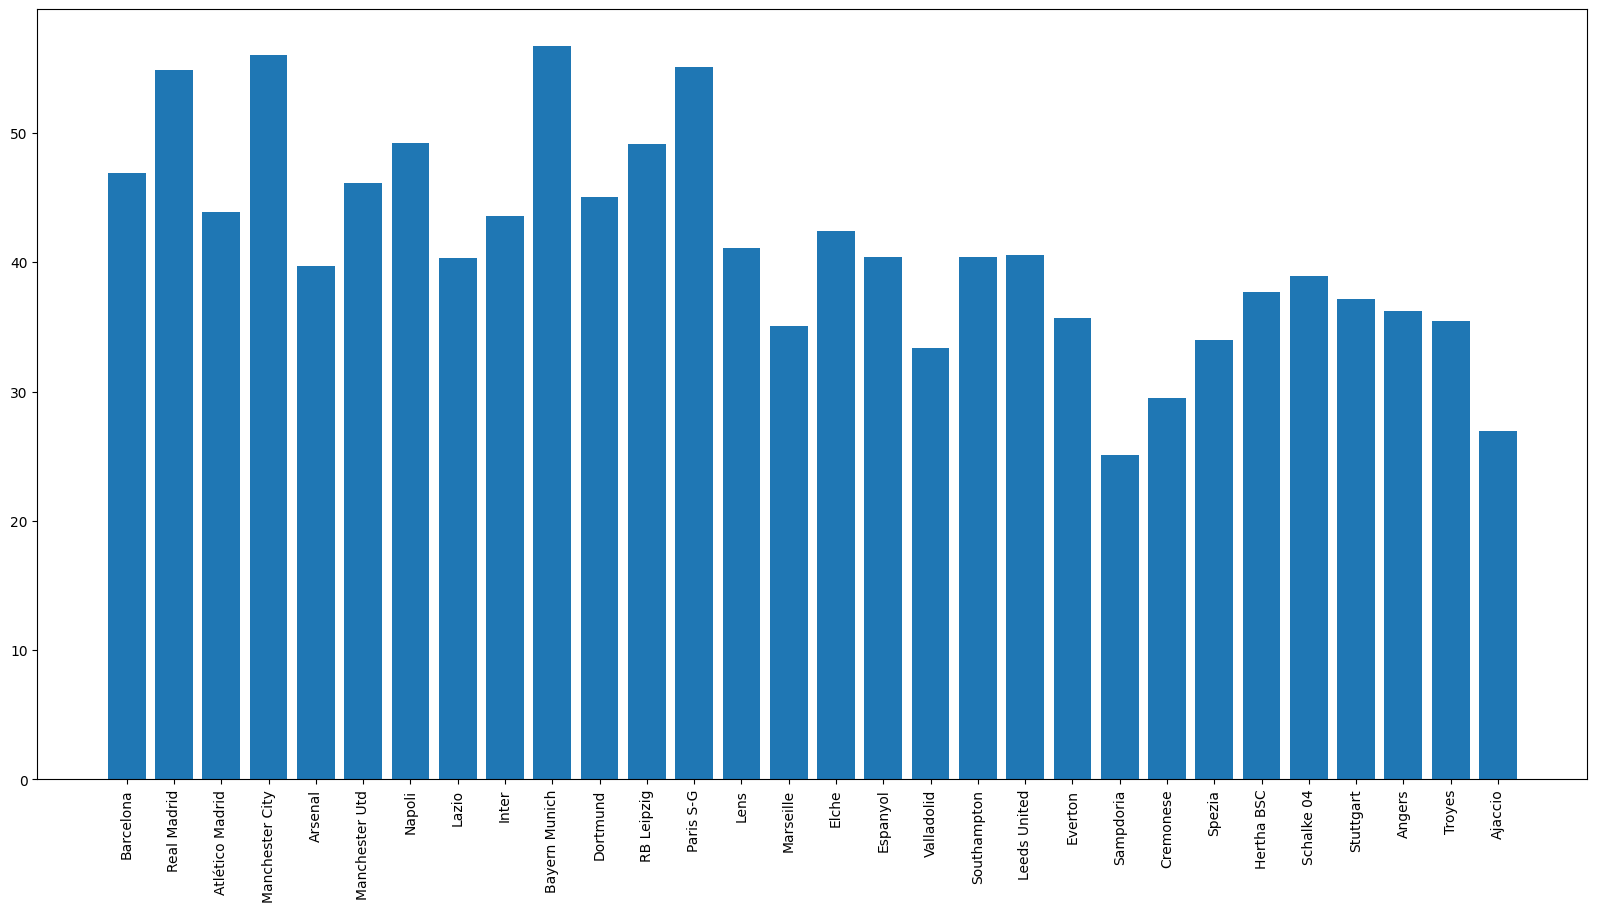

In [14]:
team_names_sorted = list(teams_data.keys())

plt.figure(figsize=(20, 10))

plt.bar(team_names_sorted, [team_distances[team] for team in team_names_sorted])

# To avoid overlapping
plt.xticks(rotation=90)

plt.show()

#### Since the best teams appear to have a bigger sum, we group them using a box plot to enhance visualization.

In [15]:
best_teams_distances = [team_distances[team] for team in list(teams_data.keys())[:15]]
worst_teams_distances = [team_distances[team] for team in list(teams_data.keys())[15:]]

to_plot = [best_teams_distances, worst_teams_distances]

groups = ['Top 15 teams', 'Bottom 15 teams']

box_colors = ['#3cb44b', '#e6194B']


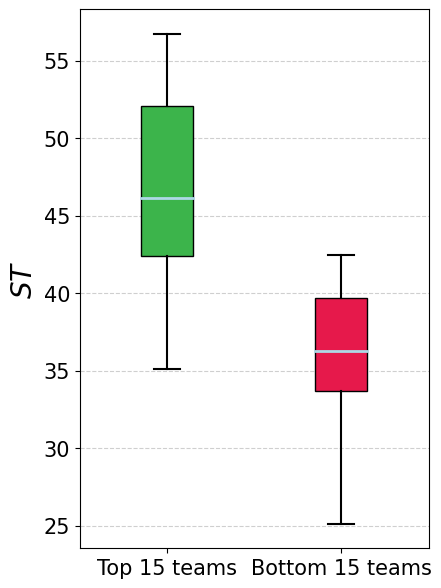

In [16]:
plt.figure(figsize=(4.5, 7))

ax = plt.axes()

bp = ax.boxplot(to_plot, patch_artist=True, labels=groups, widths=0.3,
                medianprops={'color': 'lightblue', 'linewidth': 2}) 

for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')

for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=1.5)

for cap in bp['caps']:
    cap.set(color='black', linewidth=1.5)

for flier in bp['fliers']:
    flier.set(marker='o', color='black', alpha=0.5)

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel(r'$ST$', fontsize=20)

plt.show()